# Integrated cancer cell-specific single-cell RNA-seq datasets of immune checkpoint blockade-treated patients

In [20]:
# https://www.nature.com/articles/s41597-025-04381-6

In [11]:
import warnings
from pathlib import Path
import pandas as pd

warnings.filterwarnings("ignore")

import json
import os
import datasets
import numpy as np
import scanpy as sc

In [12]:
atals_sc_path = Path("/projects/bioinformatics/DB/single_cell_atlases/immunotherapy/")

In [13]:
adata = sc.read_h5ad(atals_sc_path/"gondal2025.h5ad")

# (Number of  individual  cells, genes)

In [7]:
adata.shape

(355941, 22781)

In [23]:
adata.obs;

In [8]:
adata.obs.columns


Index(['PMID_donor_id', 'donor_id', 'pre_post', 'author_cell_type',
       'author_cell_type_update', 'outcome', 'Combined_outcome',
       'Cancer_type_update', 'Study_name', 'Primary_or_met',
       'donor_id_pre_post', 'donor_id_outcome', 'donor_id_cell_types',
       'donor_id_cell_types_pre_post', 'donor_id_pre_post_outcome',
       'tissue_ontology_term_id', 'tissue_type', 'disease_ontology_term_id',
       'cell_type_ontology_term_id', 'PMID', 'Sample',
       'Treatment.or.Mode.of.Action', 'suspension_type',
       'sex_ontology_term_id', 'assay_ontology_term_id',
       'development_stage_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'nCount_RNA',
       'nFeature_RNA', 'Study_name_cancer', 'Cell_type_broad',
       'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue',
       'self_reported_ethnicity', 'development_stage', 'observation_joinid'],
      dtype='object')

In [30]:
adata.obs['disease'].unique()

['metastatic melanoma', 'basal cell carcinoma', 'squamous cell carcinoma', 'melanoma', 'HER2 positive breast carcinoma', 'triple-negative breast carcinoma', 'estrogen-receptor positive breast cancer', 'hepatocellular carcinoma', 'intrahepatic cholangiocarcinoma', 'nonpapillary renal cell carcinoma']
Categories (10, object): ['intrahepatic cholangiocarcinoma', 'melanoma', 'metastatic melanoma', 'triple-negative breast carcinoma', ..., 'hepatocellular carcinoma', 'nonpapillary renal cell carcinoma', 'basal cell carcinoma', 'squamous cell carcinoma']

# Number of unique patients 

In [25]:
#PMID_donor_id 
#donor_id
print(adata.obs['PMID_donor_id'].nunique())
print("donor_id:",adata.obs['donor_id'].nunique())


168
donor_id: 167


# Response data

In [13]:
if 'Combined_outcome' in adata.obs.columns:
    print(adata.obs['Combined_outcome'].value_counts())
else:
    print("No 'Combined_outcome' column found.")


Combined_outcome
Unfavourable    174243
Favourable      137678
n/a              22137
UT               21883
Name: count, dtype: int64


# Pre- vs Post-treatment samples

In [16]:
adata.obs['pre_post'].value_counts()



pre_post
Post    192798
Pre     163143
Name: count, dtype: int64

#  How many cells per patient

In [17]:
adata.obs['donor_id'].value_counts().head()


donor_id
su001        11429
BIOKEY_35    11396
su010        10961
BIOKEY_10     9944
BIOKEY_12     9751
Name: count, dtype: int64

# Embedings

In [15]:
adata.obsm.keys()


KeysView(AxisArrays with keys: X_umap)

In [27]:
# only one embedding: UMAP (Uniform Manifold Approximation and Projection) 

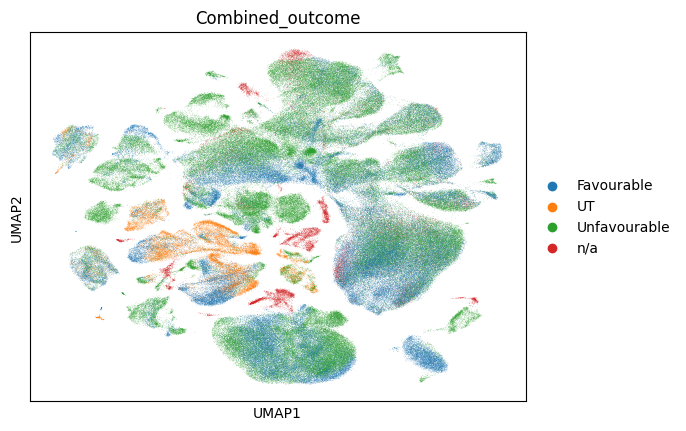

In [19]:
sc.pl.umap(adata, color='Combined_outcome')  # or any column from adata.obs


# number of cells per (donor, pre/post, outcome)

In [22]:
adata.obs.groupby(['donor_id', 'pre_post', 'Combined_outcome']).size().reset_index(name='num_cells').head()


,donor_id,pre_post,Combined_outcome,num_cells
0,BIOKEY_1,Post,Favourable,0
1,BIOKEY_1,Post,UT,0
2,BIOKEY_1,Post,Unfavourable,0
3,BIOKEY_1,Post,n/a,3889
4,BIOKEY_1,Pre,Favourable,0


In [32]:
import cellxgene_census

#help(cellxgene_census)
#help(cellxgene_census.get_anndata)
            

In [1]:
import cellxgene_census

collection_id = "61e422dd-c9cd-460e-9b91-72d9517348ef"

dataset_id = "6039d13f-0c3e-484b-b37c-ee3656c4c037"

In [39]:
import cellxgene_census
print(cellxgene_census.__version__)


1.13.1


In [14]:
# Perform PCA
sc.pp.pca(adata, n_comps=20)

# Compute neighbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

# Perform UMAP
sc.tl.umap(adata)



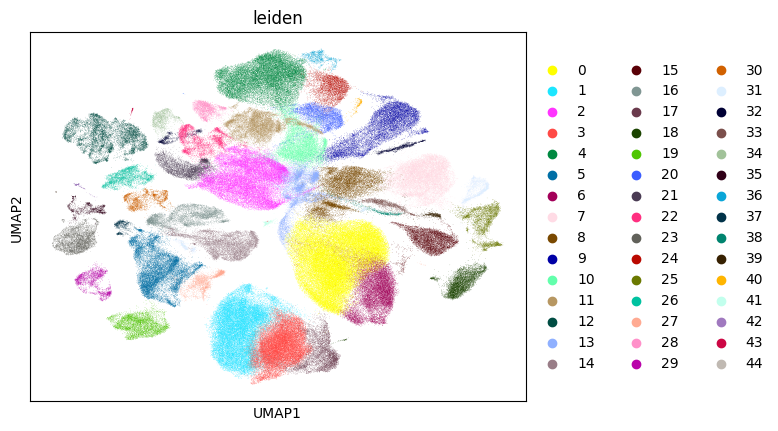

In [15]:
# Perform clustering
sc.tl.leiden(adata, resolution=0.5)

# Visualize the clusters using UMAP
sc.pl.umap(adata, color=['leiden'])



In [16]:
from cellxgene_census.experimental import get_all_available_embeddings

CENSUS_VERSION = "2023-12-15"

for e in get_all_available_embeddings(CENSUS_VERSION):
    print(f"{e['embedding_name']:15} {e['experiment_name']:15} {e['data_type']:15}")

scvi            mus_musculus    obs_embedding  
scvi            homo_sapiens    obs_embedding  
geneformer      homo_sapiens    obs_embedding  
scgpt           homo_sapiens    obs_embedding  
uce             homo_sapiens    obs_embedding  
uce             mus_musculus    obs_embedding  
nmf             homo_sapiens    obs_embedding  
nmf             homo_sapiens    var_embedding  
